In [ ]:
import sys
import os
from os.path import join
sys.path.append(os.path.abspath(".."))
from src.utils.preprocessing import preprocess_pipeline
from src.data.mnist_loader import MnistDataloader
import matplotlib.pyplot as plt
from src.utils.preprocessing import normalize_images, random_shift, random_rotation, random_noise

input_path = "../data"

mnist = MnistDataloader(
    join(input_path, "train-images-idx3-ubyte/train-images-idx3-ubyte"),
    join(input_path, "train-labels-idx1-ubyte/train-labels-idx1-ubyte"),
    join(input_path, "t10k-images-idx3-ubyte/t10k-images-idx3-ubyte"),
    join(input_path, "t10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte"),
)

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Training data (with augmentation)
x_train_prep, y_train_prep = preprocess_pipeline(
    x_train, y_train, augment=True
)

# Test data (no augmentation)
x_test_prep, y_test_prep = preprocess_pipeline(
    x_test, y_test, augment=False
)

print(x_train_prep.shape)  # (N, 1, 28, 28)
print(x_test_prep.shape)

(120000, 1, 28, 28)
(10000, 1, 28, 28)


In [2]:
assert x_train_prep.max() <= 1.0
assert x_train_prep.min() >= 0.0
assert x_train_prep.shape[1] == 1


In [ ]:
def visualize_augmented_raw(x, y, n=5):
    fig, axes = plt.subplots(n, 2, figsize=(6, 2*n))

    for i in range(n):
        img_raw = x[i]
        label = y[i]

        img = normalize_images([img_raw])[0]
        img_aug = random_shift(img)
        img_aug = random_rotation(img_aug)
        img_aug = random_noise(img_aug)

        axes[i, 0].imshow(img_raw, cmap="gray")
        axes[i, 0].set_title(f"Original (Label: {label})")
        axes[i, 0].axis("off")

        axes[i, 1].imshow(img_aug, cmap="gray")
        axes[i, 1].set_title("Augmented")
        axes[i, 1].axis("off")

    plt.tight_layout()
    plt.show()

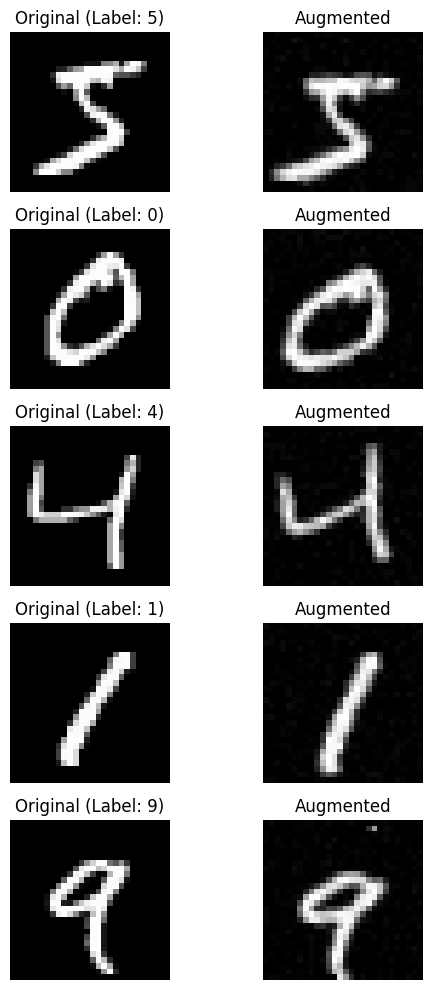

In [4]:
visualize_augmented_raw(x_train, y_train, n=5)